# Import Library & Module

In [6]:
#--Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#--Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#--Modelling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


#--Evaluasi
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Data Wrangling

## Gathering Data

In [7]:
games_df = pd.read_csv('vgsales.csv')
if games_df is not None and not games_df.empty:
    print('Dataset berhasil dibaca')
else:
    print('Dataset gagal dibaca')

Dataset berhasil dibaca


## Assesing Data

In [8]:
games_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
games_df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [10]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [11]:
games_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [12]:
games_df.isna().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [13]:
print("Jumlah duplikasi: ", games_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight**


Dataset ini termasuk besar berdasarkan jumlah datanya. Berdasarkan hasil di atas dapat dilihat bahwa mayoritas tipe data kolom adalah float, disusul dengan object dan int. Terdapat 2 kolom yang memiliki nilai null yaitu kolom 'year' dan 'publisher'. Untuk kolom 'year', perlu dilakukan analisis lebih lanjut untuk menentukan apakah akan dilakukan imputasi secara random atau penghapusan. Sementara itu, untuk kolom 'publisher', kemungkinan akan dilakukan imputasi dengan nilai "indie", namun tetap akan dilakukan analisis lebih lanjut sebelum mengambil keputusan.

# Exploratory Data Analysis (EDA)

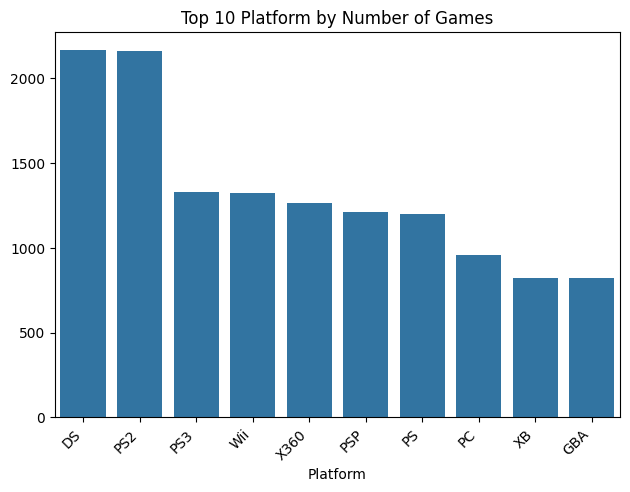

In [14]:
#Banyak game per platform (10 terbanyak)
top_platform = games_df['Platform'].value_counts().head(10)
sns.barplot(x=top_platform.index, y=top_platform.values)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title('Top 10 Platform by Number of Games')
plt.show()

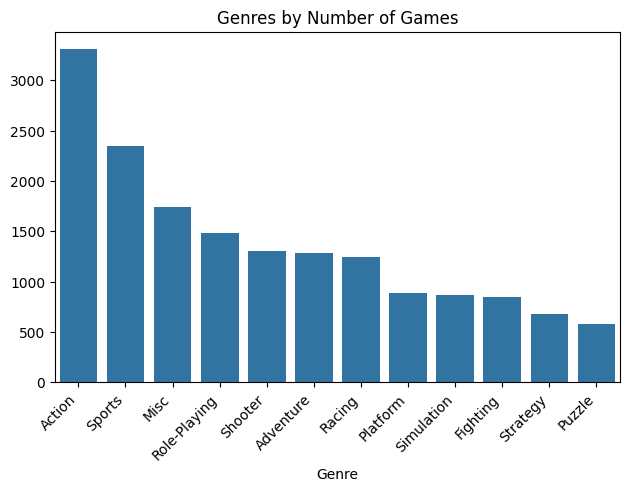

In [15]:
#Banyak game per genre

games_genre = games_df['Genre'].value_counts()
sns.barplot(x=games_genre.index, y=games_genre.values)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title('Genres by Number of Games')
plt.show()

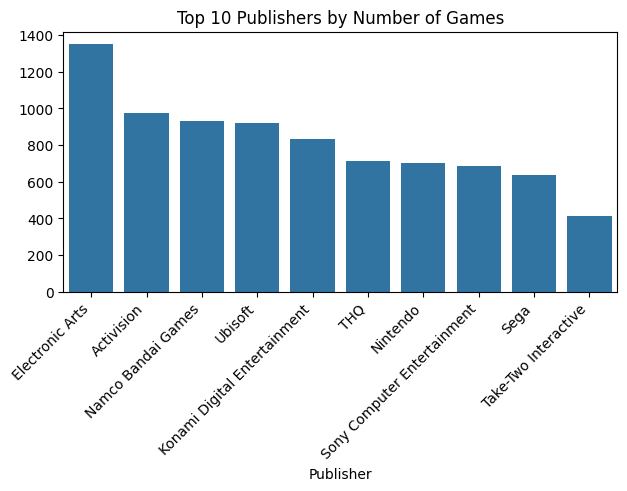

In [16]:
#Banyak game per publisher
top_publishers = games_df['Publisher'].value_counts().head(10)
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title('Top 10 Publishers by Number of Games')
plt.show()

In [17]:
games_df[games_df['Publisher'].isnull()][['Name', 'Platform', 'Genre', 'Year', 'Global_Sales']].head(10)

,Name,Platform,Genre,Year,Global_Sales
470,wwe Smackdown vs. Raw 2006,PS2,Fighting,NaN,3.00
1303,Triple Play 99,PS,Sports,NaN,1.46
1662,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,Misc,2007.0,1.21
2222,Bentley's Hackpack,GBA,Misc,2005.0,0.93
3159,Nicktoons Collection: Game Boy Advance Video V...,GBA,Misc,2004.0,0.64
3166,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,Misc,2004.0,0.64
3766,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,Misc,2004.0,0.53
4145,Sonic the Hedgehog,PS3,Platform,NaN,0.48
4526,The Fairly Odd Parents: Game Boy Advance Video...,GBA,Misc,2004.0,0.43
4635,The Fairly Odd Parents: Game Boy Advance Video...,GBA,Misc,2004.0,0.42


<ipython-input-18-74f9642132a6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Sales', data=sales_melted, palette='Set2')


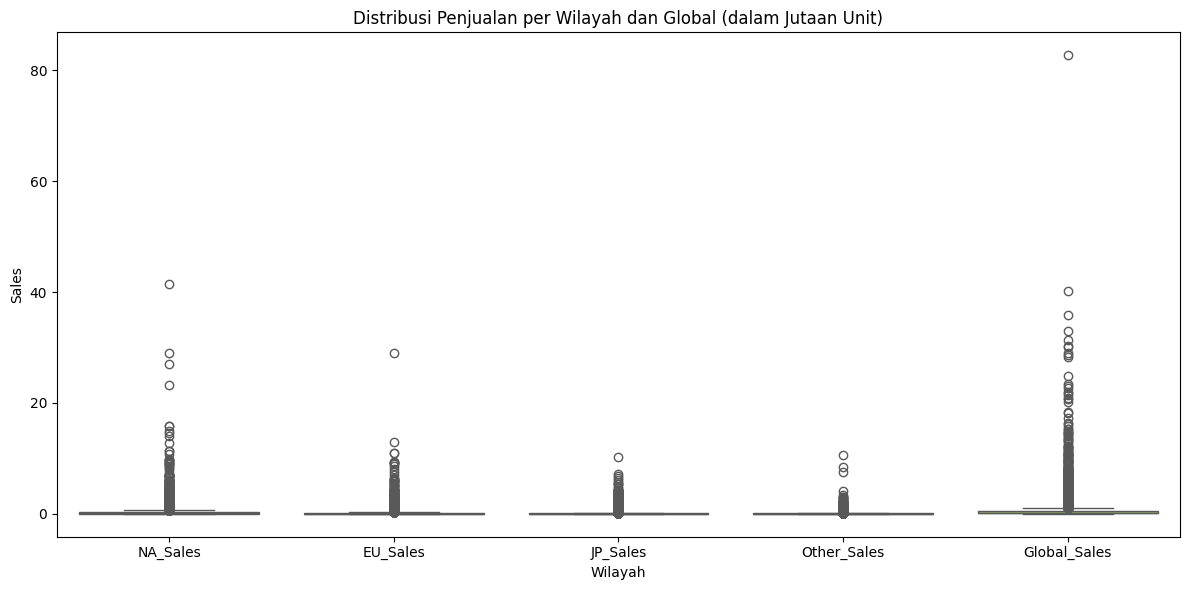

In [18]:
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
sales_melted = games_df[sales_cols].melt(var_name='Region', value_name='Sales')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Sales', data=sales_melted, palette='Set2')
plt.title('Distribusi Penjualan per Wilayah dan Global (dalam Jutaan Unit)')
plt.xlabel('Wilayah')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

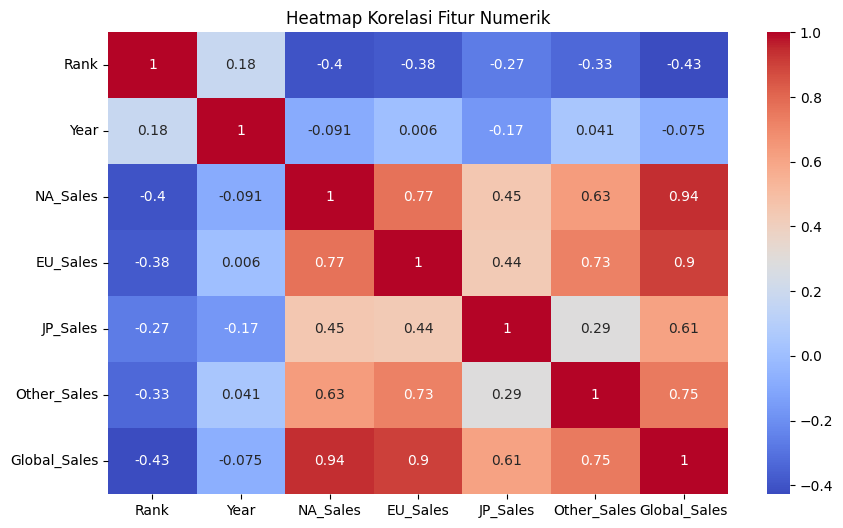

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(games_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

<ipython-input-20-90ae41e4d3b1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_platform_sales.values, y=top_platform_sales.index, palette='viridis')


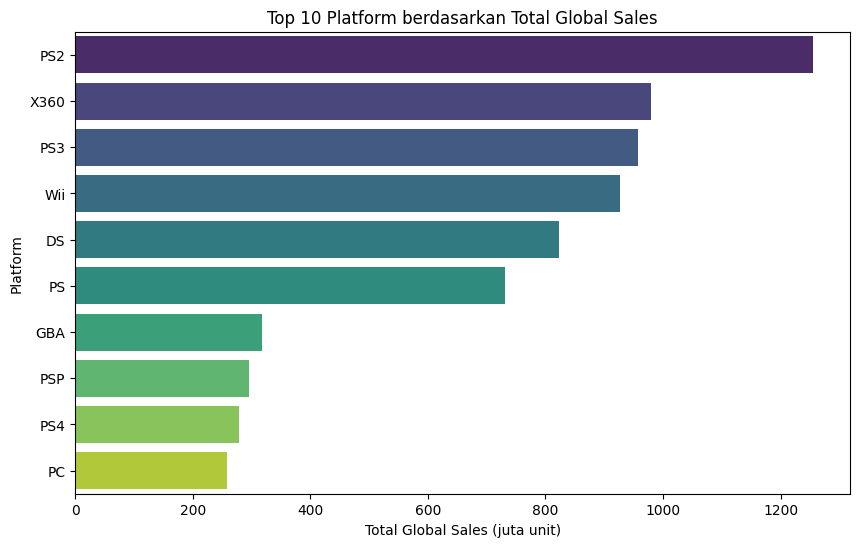

In [20]:
# 10 Platform dengan penjualan terbaik Global
top_platform_sales = games_df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_platform_sales.values, y=top_platform_sales.index, palette='viridis')
plt.title('Top 10 Platform berdasarkan Total Global Sales')
plt.xlabel('Total Global Sales (juta unit)')
plt.ylabel('Platform')
plt.show()

<ipython-input-21-75a9b04e221c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='magma')


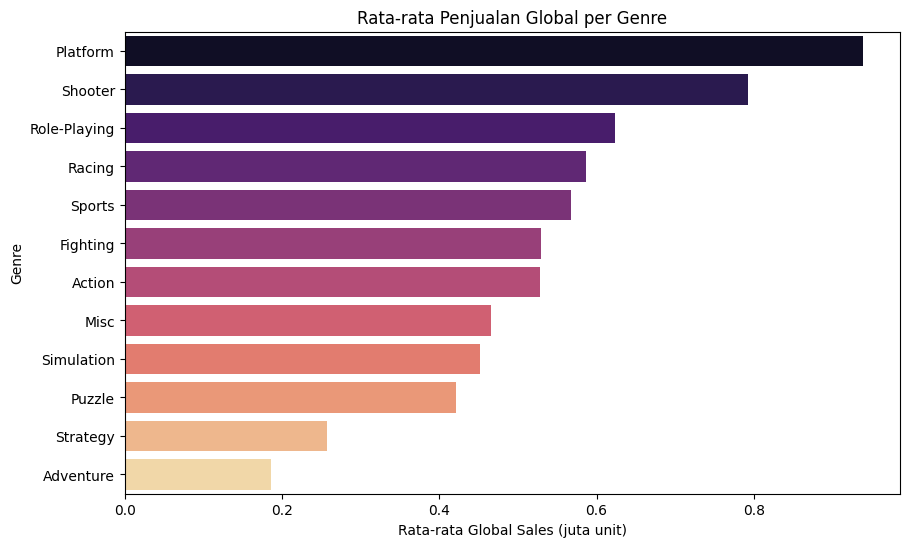

In [21]:
# Rata-rata penjualan global per genre
genre_sales = games_df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='magma')
plt.title('Rata-rata Penjualan Global per Genre')
plt.xlabel('Rata-rata Global Sales (juta unit)')
plt.ylabel('Genre')
plt.show()

**Insight**

- **Nintendo DS, PlayStation 2, dan PlayStation 3** menjadi tiga platform dengan jumlah game terbanyak dalam dataset.
- Genre **Action, Adventure, dan Misc (Miscellaneous)** menjadi tiga kategori dengan jumlah game terbanyak.
- **Electronic Arts (EA)** menjadi publisher dengan judul game terbanyak.
- Posisi kedua dan ketiga diisi oleh **Activision** dan **Bandai Namco**.
- Publisher dengan data kosong awalnya dipertimbangkan untuk diimputasi sebagai "*indie*", namun setelah analisis lebih lanjut, data tersebut akan **dihapus** karena sebagian besar merupakan game adaptasi dari franchise TV.
- Terdapat **outlier** pada data penjualan global (nilai ekstrem di sebelah kanan distribusi), yang wajar mengingat beberapa game memiliki popularitas dan penjualan jauh di atas rata-rata.
- Data penjualan kemungkinan akan **dinormalisasi** untuk analisis lebih lanjut.
- Terlihat korelasi **kuat** antara penjualan di Amerika Utara dengan penjualan global, yang menunjukkan bahwa pasar Amerika Utara memiliki pengaruh signifikan terhadap kesuksesan game secara global.
- Platform konsol tradisional seperti **PS2, PS3, Xbox 360, PS4, PS, dan Wii** mendominasi daftar platform dengan game-game penjualan tertinggi.
- Rata-rata penjualan tertinggi per genre didominasi oleh kategori **Platform**(Super Mario Series, Donkey Kong), diikuti oleh **Shooting**, dan **Role-Playing (RPG)** di posisi ketiga.


## Explanatory Analysis

### Perbandingan penjualan tiap regional pada 6 platform teratas

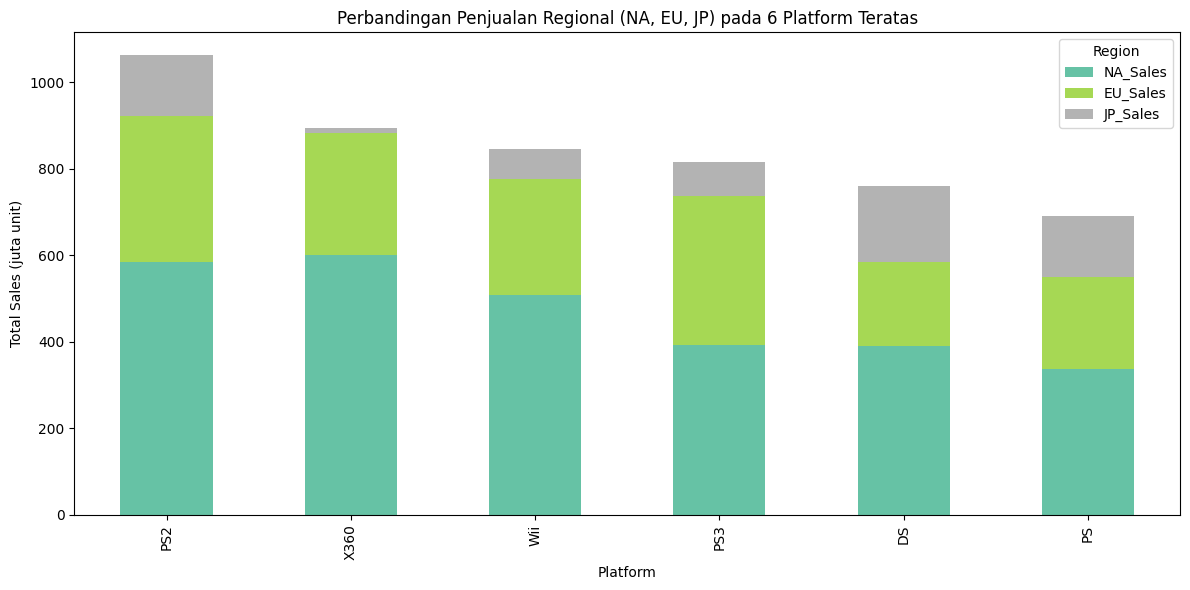

In [22]:
#Perbandingan Penjualan Regional pada 6 platform teratas
regional_sales = games_df.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()
top_platforms = regional_sales.sum(axis=1).sort_values(ascending=False).head(6).index
regional_sales = regional_sales.loc[top_platforms]

regional_sales.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Perbandingan Penjualan Regional (NA, EU, JP) pada 6 Platform Teratas')
plt.xlabel('Platform')
plt.ylabel('Total Sales (juta unit)')
plt.legend(title='Region')
plt.tight_layout()
plt.show()


### Pertumbuhan Penjualan game Per Genre (2000-2010)

<Figure size 1200x600 with 0 Axes>

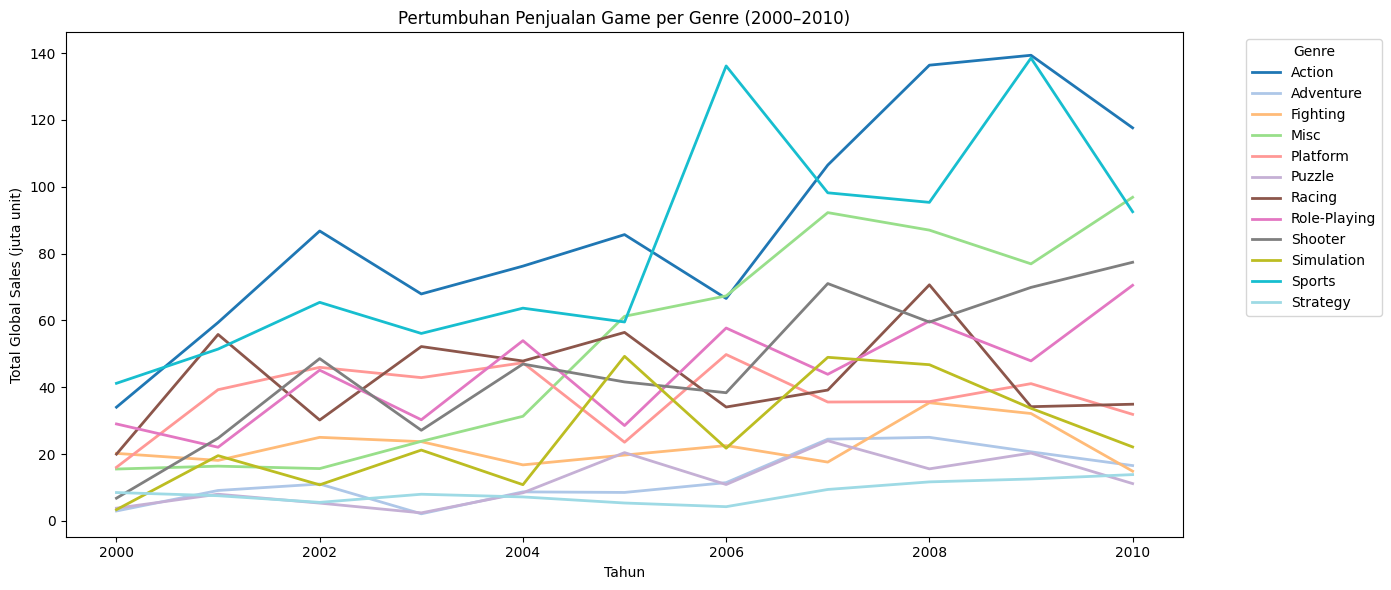

In [23]:
df_2000s = games_df[(games_df['Year'] >= 2000) & (games_df['Year'] <= 2010)]

genre_year_sales = df_2000s.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

pivot_genre = genre_year_sales.pivot(index='Year', columns='Genre', values='Global_Sales').fillna(0)

plt.figure(figsize=(12, 6))
pivot_genre.plot(figsize=(14, 6), cmap='tab20', linewidth=2)
plt.title('Pertumbuhan Penjualan Game per Genre (2000–2010)')
plt.xlabel('Tahun')
plt.ylabel('Total Global Sales (juta unit)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Dapat dilihat dilihat terdapat pertumbuhan melonjak untuk genre adventure pada 2006

In [24]:
adventure_2006 = games_df[(games_df['Year'] == 2006) & (games_df['Genre'] == 'Adventure')]

adventure_2006_sorted = adventure_2006.sort_values(by='Global_Sales', ascending=False)

adventure_2006_sorted[['Name', 'Platform', 'Publisher', 'Global_Sales']].head(10)

,Name,Platform,Publisher,Global_Sales
1276,Bratz: Forever Diamondz,DS,THQ,1.48
1639,Parfait: Chocolat Second Style,PS2,Alchemist,1.22
1873,Yakuza 2,PS2,Sega,1.09
2156,Gangs of London,PSP,Sony Computer Entertainment,0.96
3484,Phoenix Wright: Ace Attorney - Justice for All,DS,Capcom,0.58
3961,Avatar: The Last Airbender,GC,THQ,0.50
4211,Pirates of the Caribbean: Dead Man's Chest,GBA,Disney Interactive Studios,0.47
5434,Avatar: The Last Airbender,DS,THQ,0.34
5859,24: The Game,PS2,Sony Computer Entertainment,0.30
6140,Pirates of the Caribbean: Dead Man's Chest,PSP,Disney Interactive Studios,0.28


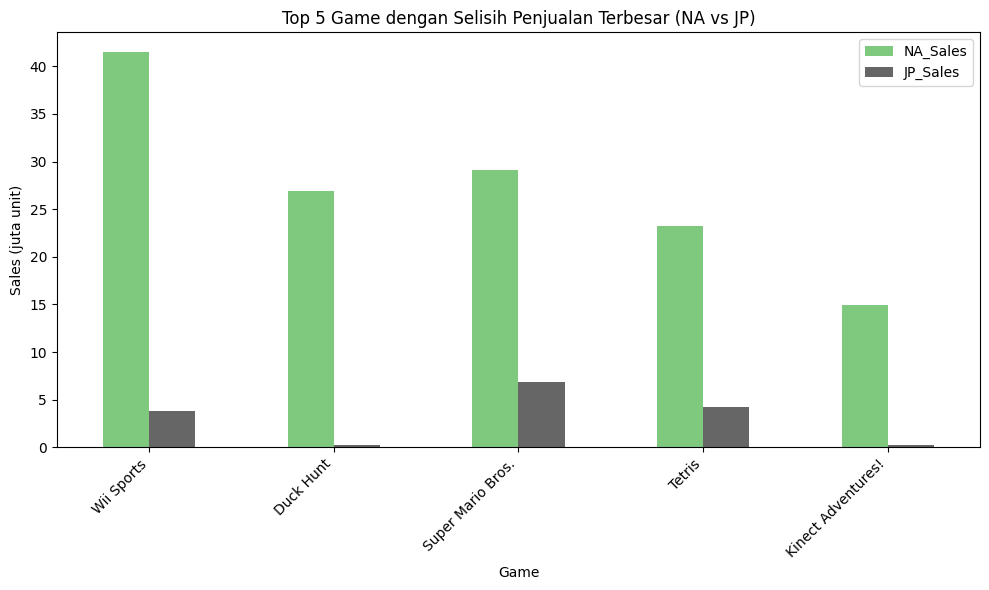

In [25]:
top_diff_games = games_df[['Name', 'NA_Sales', 'JP_Sales']].dropna()
top_diff_games = top_diff_games.loc[
    abs(top_diff_games['NA_Sales'] - top_diff_games['JP_Sales']).sort_values(ascending=False).index
].head(5)

top_diff_games.set_index('Name')[['NA_Sales', 'JP_Sales']].plot(
    kind='bar', figsize=(10, 6), colormap='Accent'
)
plt.title('Top 5 Game dengan Selisih Penjualan Terbesar (NA vs JP)')
plt.ylabel('Sales (juta unit)')
plt.xlabel('Game')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Insight

- **Amerika Utara mendominasi** penjualan game di semua platform.
- Game-game **Xbox memiliki performa buruk di pasar Jepang**, menunjukkan **minat pasar yang rendah** terhadap konsol ini di wilayah tersebut.
- **Terdapat kesenjangan signifikan** antara penjualan di **Amerika Utara dan Jepang** untuk hampir semua platform, menegaskan ketimpangan distribusi pasar.
- Tiap genre menunjukkan **pola pertumbuhan yang unik dan menarik**.
- Beberapa genre, meskipun berbeda dalam jumlah total game, menunjukkan **fluktuasi pertumbuhan yang sangat mirip**.
- **Tahun 2006 menjadi titik penting**, dengan:
  - **Peningkatan signifikan** pada genre **Adventure** dan **Role-Playing**.
  - **Penurunan tajam** pada genre **Action** dan **Shooter**.
- Genre **Adventure** dan **Role-Playing** memiliki **pola pertumbuhan yang sangat mirip sepanjang waktu**, mengindikasikan **faktor pasar yang sama** mungkin mempengaruhi keduanya.
- **Kesenjangan besar** antara penjualan di **Amerika Utara dan Jepang** terlihat jelas di mayoritas game.
- **Pasar Amerika Utara** terbukti sebagai **pasar terbesar dan paling berpengaruh** terhadap total penjualan global game.



# Data Preprocessing

### Menghapus missing values

In [26]:
#hapus baris yang memiliki tahun kosong
games_df = games_df.dropna(subset=['Year'])

In [27]:
#hapus baris game yang tidak memiliki publisher
games_df = games_df.dropna(subset=['Publisher'])

In [28]:
print(games_df.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


### Encoding fitur kategorikal

disini saya mengencoding fitur kategorikal dikarenakan model seperti linear regression hanya bisa membaca fitur numerik

In [29]:
games_df = pd.get_dummies(games_df, columns=['Genre', 'Platform'], drop_first=True)


lalu untuk publisher karena banyaknya publisher. dan juga demi mencegah high-dimensionality saya memutusukan untuk mapping semua publisher yang memiliki judul dibawah 150 game akan dijadikan "other"

In [30]:
publisher_counts = games_df['Publisher'].value_counts()
top_publishers = publisher_counts[publisher_counts > 150].index
games_df['Publisher_grouped'] = games_df['Publisher'].apply(lambda x: x if x in top_publishers else 'Other')
games_df = pd.get_dummies(games_df, columns=['Publisher_grouped'], drop_first=True)
games_df = games_df.drop('Publisher', axis=1)

In [31]:
games_df.head()

,Rank,Name,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Adventure,Genre_Fighting,...,Publisher_grouped_Other,Publisher_grouped_Sega,Publisher_grouped_Sony Computer Entertainment,Publisher_grouped_Square Enix,Publisher_grouped_THQ,Publisher_grouped_Take-Two Interactive,Publisher_grouped_Tecmo Koei,Publisher_grouped_Ubisoft,Publisher_grouped_Vivendi Games,Publisher_grouped_Warner Bros. Interactive Entertainment
0,1,Wii Sports,2006.0,41.49,29.02,3.77,8.46,82.74,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Super Mario Bros.,1985.0,29.08,3.58,6.81,0.77,40.24,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Mario Kart Wii,2008.0,15.85,12.88,3.79,3.31,35.82,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,Wii Sports Resort,2009.0,15.75,11.01,3.28,2.96,33.00,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,Pokemon Red/Pokemon Blue,1996.0,11.27,8.89,10.22,1.00,31.37,False,False,...,False,False,False,False,False,False,False,False,False,False


**Drop Kolom yang tidak dibutuhkan**

sebelum lanjut ke tahap selanjutnya kita akan drop Rank dan Name karena tidak diperlukan dalam training nantinya

In [32]:
encoded_games_df = games_df.drop(['Rank', 'Name'], axis=1)

In [33]:
encoded_games_df.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,...,Publisher_grouped_Other,Publisher_grouped_Sega,Publisher_grouped_Sony Computer Entertainment,Publisher_grouped_Square Enix,Publisher_grouped_THQ,Publisher_grouped_Take-Two Interactive,Publisher_grouped_Tecmo Koei,Publisher_grouped_Ubisoft,Publisher_grouped_Vivendi Games,Publisher_grouped_Warner Bros. Interactive Entertainment
0,2006.0,41.49,29.02,3.77,8.46,82.74,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1985.0,29.08,3.58,6.81,0.77,40.24,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,2008.0,15.85,12.88,3.79,3.31,35.82,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2009.0,15.75,11.01,3.28,2.96,33.00,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1996.0,11.27,8.89,10.22,1.00,31.37,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


lalu melakukan log transform. hal ini dilakukan karena seperti yang terlihat bahwa data sales memiliki outlier yang banyak dan cukup tinggi di beberapa game

In [34]:
for col in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']:
    encoded_games_df[f'Log_{col}'] = np.log1p(encoded_games_df[col])


In [35]:
encoded_games_df.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,...,Publisher_grouped_Take-Two Interactive,Publisher_grouped_Tecmo Koei,Publisher_grouped_Ubisoft,Publisher_grouped_Vivendi Games,Publisher_grouped_Warner Bros. Interactive Entertainment,Log_NA_Sales,Log_EU_Sales,Log_JP_Sales,Log_Other_Sales,Log_Global_Sales
0,2006.0,41.49,29.02,3.77,8.46,82.74,False,False,False,False,...,False,False,False,False,False,3.749269,3.401864,1.562346,2.247072,4.427717
1,1985.0,29.08,3.58,6.81,0.77,40.24,False,False,False,True,...,False,False,False,False,False,3.403860,1.521699,2.055405,0.570980,3.719409
2,2008.0,15.85,12.88,3.79,3.31,35.82,False,False,False,False,...,False,False,False,False,False,2.824351,2.630449,1.566530,1.460938,3.606041
3,2009.0,15.75,11.01,3.28,2.96,33.00,False,False,False,False,...,False,False,False,False,False,2.818398,2.485740,1.453953,1.376244,3.526361
4,1996.0,11.27,8.89,10.22,1.00,31.37,False,False,False,False,...,False,False,False,False,False,2.507157,2.291524,2.417698,0.693147,3.477232


In [36]:
encoded_games_df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Log_NA_Sales,Log_EU_Sales,Log_JP_Sales,Log_Other_Sales,Log_Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910,0.175573,0.104257,0.057599,0.040264,0.307607
std,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345,0.282503,0.214374,0.161205,0.101811,0.397630
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.009950
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,0.000000,0.000000,0.000000,0.000000,0.058269
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,0.076961,0.019803,0.000000,0.009950,0.157004
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000,0.215111,0.104360,0.039221,0.039221,0.392042
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000,3.749269,3.401864,2.417698,2.448416,4.427717


In [37]:
scaler = StandardScaler()
encoded_games_df[['Year', 'Log_NA_Sales', 'Log_EU_Sales', 'Log_JP_Sales', 'Log_Other_Sales']] = scaler.fit_transform(
    encoded_games_df[['Year', 'Log_NA_Sales', 'Log_EU_Sales', 'Log_JP_Sales', 'Log_Other_Sales']]
)

In [38]:
encoded_games_df.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,...,Publisher_grouped_Take-Two Interactive,Publisher_grouped_Tecmo Koei,Publisher_grouped_Ubisoft,Publisher_grouped_Vivendi Games,Publisher_grouped_Warner Bros. Interactive Entertainment,Log_NA_Sales,Log_EU_Sales,Log_JP_Sales,Log_Other_Sales,Log_Global_Sales
0,-0.069538,41.49,29.02,3.77,8.46,82.74,False,False,False,False,...,False,False,False,False,False,12.650494,15.382974,9.334664,21.676212,4.427717
1,-3.670217,29.08,3.58,6.81,0.77,40.24,False,False,False,True,...,False,False,False,False,False,11.427786,6.612210,12.393343,5.212913,3.719409
2,0.273384,15.85,12.88,3.79,3.31,35.82,False,False,False,False,...,False,False,False,False,False,9.376384,11.784407,9.360620,13.954463,3.606041
3,0.444845,15.75,11.01,3.28,2.96,33.00,False,False,False,False,...,False,False,False,False,False,9.355313,11.109354,8.662249,13.122564,3.526361
4,-1.784147,11.27,8.89,10.22,1.00,31.37,False,False,False,False,...,False,False,False,False,False,8.253554,10.203360,14.640819,6.412896,3.477232


In [39]:
encoded_games_df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Log_NA_Sales,Log_EU_Sales,Log_JP_Sales,Log_Other_Sales,Log_Global_Sales
count,1.629100e+04,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,1.629100e+04,16291.000000,1.629100e+04,1.629100e+04,16291.000000
mean,4.396459e-15,0.265647,0.147731,0.078833,0.048426,0.540910,5.582805e-17,0.000000,4.187103e-17,-2.791402e-17,0.307607
std,1.000031e+00,0.822432,0.509303,0.311879,0.190083,1.567345,1.000031e+00,1.000031,1.000031e+00,1.000031e+00,0.397630
min,-4.527522e+00,0.000000,0.000000,0.000000,0.000000,0.010000,-6.215108e-01,-0.486350,-3.573156e-01,-3.954917e-01,0.009950
25%,-5.839206e-01,0.000000,0.000000,0.000000,0.000000,0.060000,-6.215108e-01,-0.486350,-3.573156e-01,-3.954917e-01,0.058269
50%,1.019230e-01,0.080000,0.020000,0.000000,0.010000,0.170000,-3.490771e-01,-0.393973,-3.573156e-01,-2.977553e-01,0.157004
75%,6.163057e-01,0.240000,0.110000,0.040000,0.040000,0.480000,1.399602e-01,0.000478,-1.140108e-01,-1.024915e-02,0.392042
max,2.330915e+00,41.490000,29.020000,10.220000,10.570000,82.740000,1.265049e+01,15.382974,1.464082e+01,2.365389e+01,4.427717


kenapa saya memutuskan untuk membuat kolom baru pada log transformasi hal ini diperlukan agar memudahkan dalam proses pembandingann, prediksi dan visualisasi setelah hasil prediksi

<ipython-input-40-ecd95dcc136b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Sales', data=sales_melted, palette='Set2')


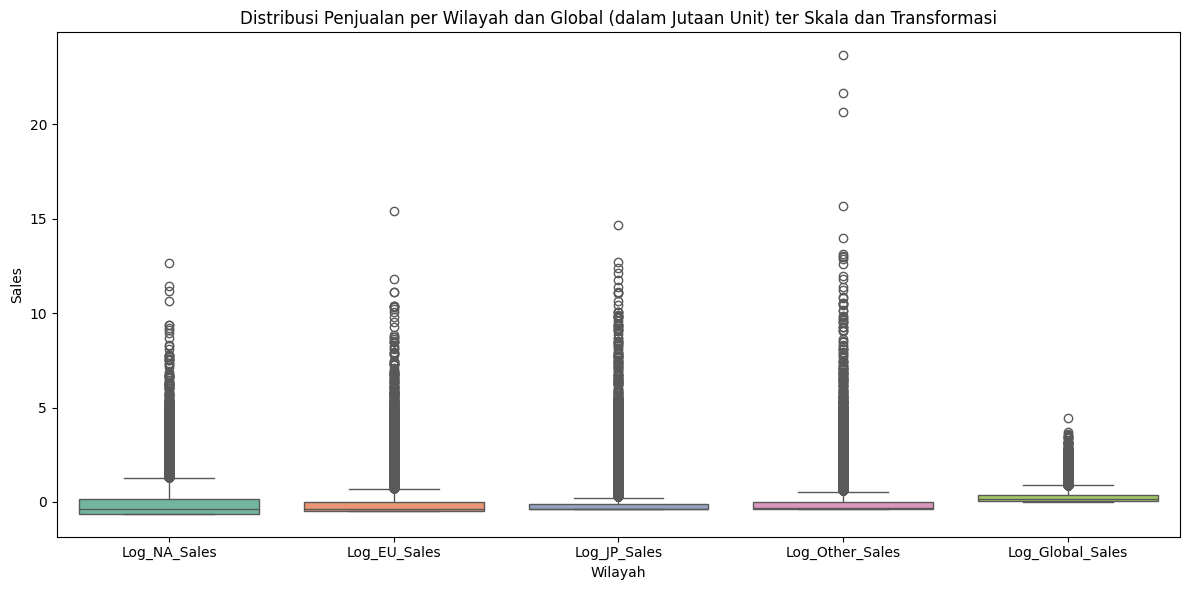

In [40]:
log_sales_cols = ['Log_NA_Sales', 'Log_EU_Sales', 'Log_JP_Sales', 'Log_Other_Sales', 'Log_Global_Sales']

sales_melted = encoded_games_df[log_sales_cols].melt(var_name='Region', value_name='Sales')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Sales', data=sales_melted, palette='Set2')
plt.title('Distribusi Penjualan per Wilayah dan Global (dalam Jutaan Unit) ter Skala dan Transformasi')
plt.xlabel('Wilayah')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

In [41]:
encoded_games_df.shape

(16291, 75)

## Split Dataset

In [42]:
X = encoded_games_df.drop(columns=['Global_Sales','Log_Global_Sales'])

y = encoded_games_df['Log_Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelling

### Fungsi Evaluasi

In [43]:
def evaluate_model(model, X_test, y_test, log_transformed=True):

    y_pred = model.predict(X_test)

    if log_transformed:
        y_pred = np.expm1(y_pred)
        y_test = np.expm1(y_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)  # pastikan ini dari sklearn
    r2 = r2_score(y_test, y_pred)

    return {'MAE': mae, 'RMSE': rmse, 'R2': r2}

## Linear Regression

In [44]:
base_model = LinearRegression()
base_model.fit(X_train, y_train)

results = {}
results['Linear Regression'] = evaluate_model(base_model, X_test, y_test)

## Random Forest & XGBoost

In [45]:
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 6],
        'learning_rate': [0.1, 0.2]
    }
}

In [46]:

models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0)
}

for name, model in models.items():
    print(f"🔍 Tuning {name}...")
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        scoring='neg_root_mean_squared_error',
        cv=3,
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    print(f"✅ Best params for {name}: {grid.best_params_}")

    results[name] = evaluate_model(best_model, X_test, y_test)

🔍 Tuning Random Forest...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
✅ Best params for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
🔍 Tuning XGBoost...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
✅ Best params for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


Insight dari Pemilihan Model

- Saya menggunakan **tiga model regresi** dalam proyek ini, yaitu:
  - **Linear Regression** (sebagai baseline)
  - **Random Forest Regressor**
  - **XGBoost Regressor**

- **Linear Regression** dipilih sebagai baseline karena model ini:
  - Merupakan model regresi paling sederhana dan mudah diinterpretasikan.
  - Cepat dalam pelatihan dan evaluasi.
  - Digunakan sebagai acuan awal untuk menilai apakah model yang lebih kompleks memberikan peningkatan performa yang signifikan.

- **Random Forest** dan **XGBoost** dipilih karena mempertimbangkan karakteristik data, yaitu:
  - Dataset memiliki banyak fitur kategorikal (seperti Genre, Platform, Publisher) yang telah diencoding.
  - Terdapat fitur numerik dengan distribusi skewed dan kehadiran outlier.
  - Kedua model ini merupakan **tree-based models** yang:
    - Tidak sensitif terhadap skala fitur (tidak memerlukan scaling).
    - Robust terhadap outlier.
    - Mampu menangani relasi non-linear antar fitur.

- **XGBoost** memiliki keunggulan tambahan berupa:
  - Fitur regularisasi untuk mencegah overfitting.
  - Kemampuan mengatur kompleksitas model melalui parameter seperti `max_depth`, `learning_rate`, dan `n_estimators`.
- Dalam proses pelatihan, saya menggunakan **GridSearchCV** untuk melakukan pencarian kombinasi hyperparameter terbaik secara sistematis.  
  - Grid Search memudahkan proses eksplorasi terhadap parameter penting seperti jumlah pohon (`n_estimators`), kedalaman pohon (`max_depth`), dan learning rate.
  - Dengan pendekatan ini, model yang dihasilkan dapat mencapai performa optimal tanpa harus melakukan tuning manual yang rawan bias dan tidak efisien.


# Evaluation

In [47]:
results_df = pd.DataFrame(results).T.sort_values(by='RMSE')
print(results_df)

                        MAE      RMSE        R2
XGBoost            0.043057  0.534381  0.840354
Random Forest      0.039729  0.565294  0.831119
Linear Regression  0.099446  1.595235  0.523425


Insight Hasil Evaluasi Model


Berdasarkan hasil evaluasi terhadap ketiga model yang diuji menggunakan data uji (test set), diperoleh metrik performa sebagai berikut:

| Model              | MAE     | RMSE    | R²      |
|-------------------|---------|---------|---------|
| XGBoost            | 0.0431  | 0.5344  | 0.8404  |
| Random Forest      | 0.0397  | 0.5653  | 0.8311  |
| Linear Regression  | 0.0994  | 1.5952  | 0.5234  |

- **XGBoost** menjadi model dengan performa **terbaik secara keseluruhan**, dengan:
  - Nilai **R² sebesar 0.84**, artinya model mampu menjelaskan 84% variasi data target (Global Sales).
  - **RMSE dan MAE yang rendah**, menunjukkan bahwa prediksi yang dihasilkan cenderung akurat dan stabil.

- **Random Forest** juga menunjukkan performa yang sangat kompetitif:
  - MAE-nya bahkan sedikit **lebih rendah** dari XGBoost, menandakan prediksi rata-rata yang sangat dekat dengan nilai aktual.
  - Namun, RMSE-nya sedikit lebih tinggi, menunjukkan adanya beberapa error besar (outlier) yang memengaruhi hasil akhir.

- **Linear Regression** sebagai baseline menunjukkan performa yang **jauh lebih rendah**:
  - R² hanya **0.52**, menunjukkan bahwa model ini hanya bisa menjelaskan sekitar 52% variasi data.
  - Nilai **RMSE-nya tiga kali lebih besar** dari model tree-based, menunjukkan bahwa model ini tidak cocok untuk menangkap kompleksitas relasi antar fitur dalam data.

- Model **tree-based seperti XGBoost dan Random Forest** jauh lebih cocok untuk dataset ini dibanding model linear.
- **XGBoost** dipilih sebagai model akhir karena memberikan keseimbangan terbaik antara akurasi dan generalisasi.